In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sn

C:\Users\shrey\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
! pip install nltk
! pip install wordcloud

In [3]:
# NLP packages
import nltk
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud

In [4]:
# Modeling packages
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [5]:
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 14, 6
plt.style.use('ggplot')

# Read the amazon baby product review data

In [6]:
products = pd.read_csv(r"amazon_baby.csv")

In [7]:
products.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


# Data Exploration

In [8]:
products['count'] = np.zeros(len(products))

In [9]:
products_grp = products.groupby(['name']).count().sort_values(['count'], ascending = False)

In [10]:
products_grp.head()

,review,rating,count
name,,,
Vulli Sophie the Giraffe Teether,779,785,785
"Simple Wishes Hands-Free Breastpump Bra, Pink, XS-L",560,562,562
Infant Optics DXR-5 2.4 GHz Digital Video Baby Monitor with Night Vision,558,561,561
Baby Einstein Take Along Tunes,545,547,547
"Cloud b Twilight Constellation Night Light, Turtle",517,520,520


In [11]:
products['review'] = products['review'].astype(str)

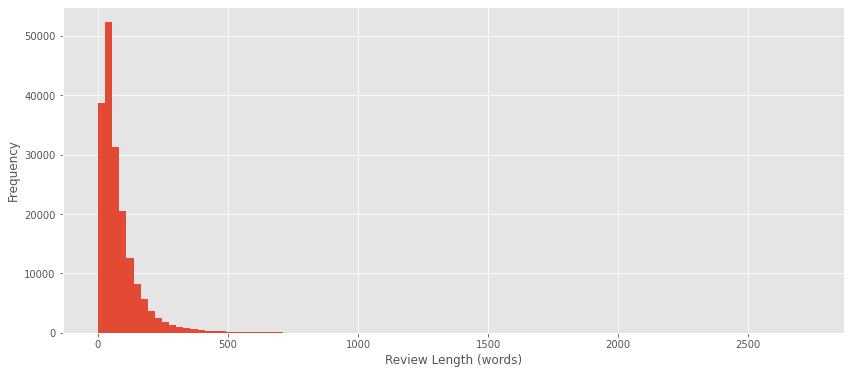

In [12]:
## Getting the number of words by splitting them by a space
words_per_review = products.review.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 100)
plt.xlabel('Review Length (words)')
plt.ylabel('Frequency')
plt.show()

In [13]:
print('Average words:', words_per_review.mean())
print('Skewness:', words_per_review.skew())

Average words: 83.13072450975585
Skewness: 4.71961248681518


In [14]:
percent_val = 100 * products['rating'].value_counts()/len(products)
percent_val

5    58.330200
4    18.092311
3     9.142325
1     8.272717
2     6.162447
Name: rating, dtype: float64

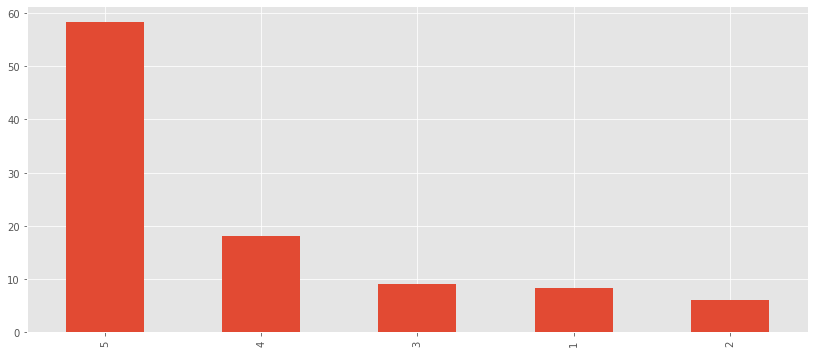

In [15]:
percent_val.plot.bar()
plt.show()

# Text visualization using word clouds (word clouds )

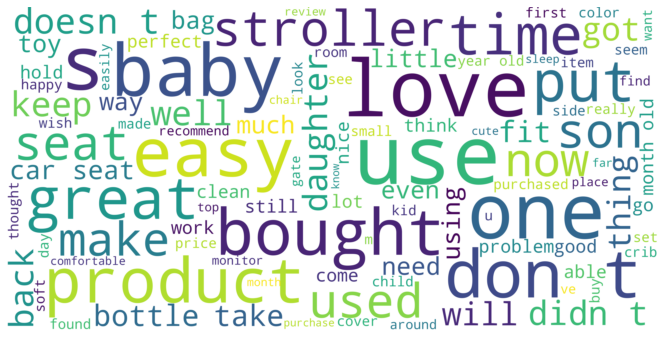

In [16]:
word_cloud_text = ''.join(products['review'])

wordcloud = WordCloud(max_font_size=100, # Maximum font size for the largest word
                      max_words=100, # The maximum number of words
                      background_color="white", # Background color for the word cloud image
                      scale = 10, # Scaling between computation and drawing
                      width=800, # Width of the canvas
                      height=400 # Height of the canvas
                     ).generate(word_cloud_text)

plt.figure()
plt.imshow(wordcloud, 
           interpolation="bilinear") # to make the displayed image appear more smoothly
plt.axis("off")
plt.show()

# Examine the reivews for the most-reviewed product

In [17]:
giraffe_reviews = products[products['name']=='Vulli Sophie the Giraffe Teether']

In [18]:
giraffe_reviews

,name,review,rating,count
34313,Vulli Sophie the Giraffe Teether,He likes chewing on all the parts especially t...,5,0.0
34314,Vulli Sophie the Giraffe Teether,My son loves this toy and fits great in the di...,5,0.0
34315,Vulli Sophie the Giraffe Teether,There really should be a large warning on the ...,1,0.0
34316,Vulli Sophie the Giraffe Teether,All the moms in my moms\' group got Sophie for...,5,0.0
34317,Vulli Sophie the Giraffe Teether,I was a little skeptical on whether Sophie was...,5,0.0
...,...,...,...,...
159649,Vulli Sophie the Giraffe Teether,My baby loves her Sophie Chew Toy. She can che...,5,0.0
159650,Vulli Sophie the Giraffe Teether,Sophie the Giraffe was a big hit at the baby s...,5,0.0
159651,Vulli Sophie the Giraffe Teether,quick shipping and perfect product. I would pu...,5,0.0
159652,Vulli Sophie the Giraffe Teether,My baby who is currently teething love his Sop...,5,0.0


<AxesSubplot:xlabel='count'>

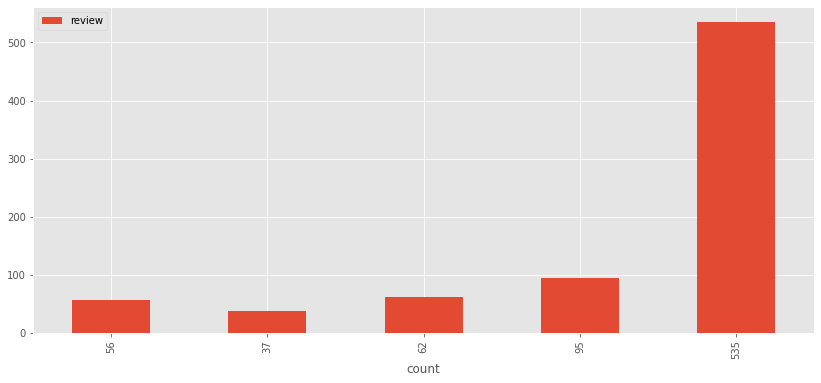

In [19]:
(giraffe_reviews.groupby('rating').count()).plot.bar(x = 'count', y = 'review')

# Cleaning data (Reviews column)

In [20]:
products['review_lower'] = products['review'].str.lower()

# Word tokenization example:
word_tokenize("DPhi Bootcamp rules. It is awesome :D")
products.head()

,name,review,rating,count,review_lower
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,0.0,"these flannel wipes are ok, but in my opinion ..."
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,0.0,it came early and was not disappointed. i love...
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,0.0,very soft and comfortable and warmer than it l...
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,0.0,this is a product well worth the purchase. i ...
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,0.0,all of my kids have cried non-stop when i trie...


# Count the unique tokens using nltk word_tokenizer

In [21]:
# For reviews not converted to lower case
token_lists = [word_tokenize(each) for each in products['review']]
tokens = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens then: ",len(set(tokens)))

# For reviews converted to lower case
token_lists_lower = [word_tokenize(each) for each in products['review_lower']]
tokens_lower = [item for sublist in token_lists_lower for item in sublist]
print("Number of unique tokens now: ",len(set(tokens_lower)))

Number of unique tokens then:  169230
Number of unique tokens now:  147786


In [22]:
print("Percentage reduction in the number of unique tokens is: ", (len(set(tokens)) - len(set(tokens_lower))) / len(set(tokens)) * 100)

Percentage reduction in the number of unique tokens is:  12.671512143237015


In [23]:
### Selecting non alpha numeric charactes that are not spaces
spl_chars = products['review'].apply(lambda review: [char for char in list(review) if not char.isalnum() and char != ' '])

## Getting list of list into a single list
flat_list = [item for sublist in spl_chars for item in sublist]

## Unique special characters
set(flat_list)

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~'}

# Decomose using regular expression [^A-Za-z0-9 ]+:

* [ ]: match any character inside the list defined by the square brackets, including the space character ' '
* ^: start of the line
* A-Z: accept english upper case characters from A to Z
* a-z: accept english lower case characters from a to z
* 0-9: accept single number characters from 0 to 9

In [24]:
review_backup = products['review_lower'].copy()
products['review_lower'] = products['review_lower'].str.replace(r'[^A-Za-z0-9 ]+', ' ')

In [25]:
token_lists = [word_tokenize(each) for each in products['review_lower']]
tokens_after = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens after lower and special charecter removal: ",len(set(tokens_after)))

Number of unique tokens after lower and special charecter removal:  67993


In [26]:
print("Percentage reduction in the number of unique tokens after lower and speacial charecter removal is: ", (len(set(tokens)) - len(set(tokens_after))) / len(set(tokens)) * 100)

Percentage reduction in the number of unique tokens after lower and speacial charecter removal is:  59.822135555161616


# Removal of stopwords and high/low frequency words

In [27]:
from nltk.corpus import stopwords
nltk.download('stopwords')
print(stopwords.fileids())

['arabic', 'azerbaijani', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'greek', 'hungarian', 'indonesian', 'italian', 'kazakh', 'nepali', 'norwegian', 'portuguese', 'romanian', 'russian', 'slovene', 'spanish', 'swedish', 'tajik', 'turkish']


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
eng_stop_words = stopwords.words('english')
eng_stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [29]:
stop_words = set(eng_stop_words)

def stopwords_removal(stop_words, sentence):
    return [word for word in nltk.word_tokenize(sentence) if word not in stop_words]

In [30]:
products['review_lower'] = products['review_lower'].apply(lambda row: stopwords_removal(stop_words, row))

In [31]:
products.head()

,name,review,rating,count,review_lower
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,0.0,"[flannel, wipes, ok, opinion, worth, keeping, ..."
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,0.0,"[came, early, disappointed, love, planet, wise..."
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,0.0,"[soft, comfortable, warmer, looks, fit, full, ..."
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,0.0,"[product, well, worth, purchase, found, anythi..."
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,0.0,"[kids, cried, non, stop, tried, ween, pacifier..."


In [32]:
# Convert the column review_lower back to string
def string_convert(input_list):
    string = ' '.join(input_list)
    return string

In [33]:
products['review_lower'] = products['review_lower'].apply(lambda row: string_convert(row))

In [34]:
type(products.review_lower[0])

str

In [35]:
products.head()

,name,review,rating,count,review_lower
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,0.0,flannel wipes ok opinion worth keeping also or...
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,0.0,came early disappointed love planet wise bags ...
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,0.0,soft comfortable warmer looks fit full size be...
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,0.0,product well worth purchase found anything els...
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,0.0,kids cried non stop tried ween pacifier found ...


In [36]:
token_lists = [word_tokenize(each) for each in products['review_lower']]
tokens_stop = [item for sublist in token_lists for item in sublist]
print("Number of unique tokens after lower and special charecter and stop words removal: ",len(set(tokens_stop)))

Number of unique tokens after lower and special charecter and stop words removal:  67841


In [37]:
print("Percentage reduction in the number of unique tokens after lower and speacial charecter removal is: ", (len(set(tokens)) - len(set(tokens_stop))) / len(set(tokens)) * 100)

Percentage reduction in the number of unique tokens after lower and speacial charecter removal is:  59.91195414524611


# Stemming & lemmatization

In [38]:
from nltk.stem import PorterStemmer, LancasterStemmer # Common stemmers
from nltk.stem import WordNetLemmatizer # Common Lematizer
nltk.download('wordnet')
from nltk.corpus import wordnet

porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shrey\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [39]:
print("Lancaster Stemmer")
print(lancaster.stem("trouble"))
print(lancaster.stem("troubling"))
print(lancaster.stem("troubled"))

# Provide a word to be lemmatized
print("WordNet Lemmatizer")
print(lemmatizer.lemmatize("trouble", wordnet.NOUN))
print(lemmatizer.lemmatize("troubling", wordnet.VERB))
print(lemmatizer.lemmatize("troubled", wordnet.VERB))

Lancaster Stemmer
troubl
troubl
troubl
WordNet Lemmatizer
trouble
trouble
trouble


# add word counter for each reviews

In [40]:
from collections import Counter
products['word_count'] = products['review'].apply(lambda x: Counter(x.lower().split()) if type(x) == str else np.nan)

In [41]:
products.head()

,name,review,rating,count,review_lower,word_count
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3,0.0,flannel wipes ok opinion worth keeping also or...,"{'these': 1, 'flannel': 1, 'wipes': 2, 'are': ..."
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,0.0,came early disappointed love planet wise bags ...,"{'it': 2, 'came': 1, 'early': 1, 'and': 3, 'wa..."
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,0.0,soft comfortable warmer looks fit full size be...,"{'very': 1, 'soft': 1, 'and': 2, 'comfortable'..."
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,0.0,product well worth purchase found anything els...,"{'this': 3, 'is': 4, 'a': 2, 'product': 2, 'we..."
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,0.0,kids cried non stop tried ween pacifier found ...,"{'all': 2, 'of': 1, 'my': 1, 'kids': 2, 'have'..."


# Define what is positive and negative sentiment

In [42]:
#ignore all 3*  reviews
products = products[products['rating']!= 3]

In [43]:
#positive sentiment = 4-star or 5-star reviews
products['sentiment'] = np.where(products.rating > 3,1,0)

In [44]:
products.tail()

,name,review,rating,count,review_lower,word_count,sentiment
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5,0.0,great idea handy look really cool mention grea...,"{'such': 1, 'a': 1, 'great': 2, 'idea!': 1, 'v...",1
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5,0.0,product rocks great blend function fashion asi...,"{'this': 1, 'product': 2, 'rocks!': 1, 'it': 2...",1
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5,0.0,item looks great cool kids know company great ...,"{'this': 2, 'item': 1, 'looks': 1, 'great': 2,...",1
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5,0.0,extremely happy product searching product like...,"{'i': 9, 'am': 2, 'extremely': 1, 'happy': 1, ...",1
183530,Best 2 Pack Baby Car Shade for Kids - Window S...,I love this product very mush . I have bought ...,5,0.0,love product mush bought many car shades earli...,"{'i': 2, 'love': 1, 'this': 1, 'product': 1, '...",1


In [45]:
products[(products['rating'] == 5)]      # Checking for 5 ratings and its sentiment column.

,name,review,rating,count,review_lower,word_count,sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,0.0,came early disappointed love planet wise bags ...,"{'it': 2, 'came': 1, 'early': 1, 'and': 3, 'wa...",1
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,0.0,soft comfortable warmer looks fit full size be...,"{'very': 1, 'soft': 1, 'and': 2, 'comfortable'...",1
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,0.0,product well worth purchase found anything els...,"{'this': 3, 'is': 4, 'a': 2, 'product': 2, 'we...",1
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,0.0,kids cried non stop tried ween pacifier found ...,"{'all': 2, 'of': 1, 'my': 1, 'kids': 2, 'have'...",1
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,0.0,binky fairy came house special gift book help ...,"{'when': 2, 'the': 6, 'binky': 3, 'fairy': 3, ...",1
...,...,...,...,...,...,...,...
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5,0.0,great idea handy look really cool mention grea...,"{'such': 1, 'a': 1, 'great': 2, 'idea!': 1, 'v...",1
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5,0.0,product rocks great blend function fashion asi...,"{'this': 1, 'product': 2, 'rocks!': 1, 'it': 2...",1
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5,0.0,item looks great cool kids know company great ...,"{'this': 2, 'item': 1, 'looks': 1, 'great': 2,...",1
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5,0.0,extremely happy product searching product like...,"{'i': 9, 'am': 2, 'extremely': 1, 'happy': 1, ...",1


In [46]:
products[(products['rating'] == 2)]      # Checking for 2 ratings and its sentiment column.

,name,review,rating,count,review_lower,word_count,sentiment
21,Nature\'s Lullabies Second Year Sticker Calendar,I only purchased a second-year calendar for my...,2,0.0,purchased second year calendar son one daughte...,"{'i': 4, 'only': 2, 'purchased': 1, 'a': 1, 's...",0
41,"SoftPlay Giggle Jiggle Funbook, Happy Bear",This bear is absolutely adorable and I would g...,2,0.0,bear absolutely adorable would give 5 star rat...,"{'this': 1, 'bear': 1, 'is': 1, 'absolutely': ...",0
71,Wall Decor Removable Decal Sticker - Colorful ...,Would not purchase again or recommend. The dec...,2,0.0,would purchase recommend decals thick almost p...,"{'would': 2, 'not': 2, 'purchase': 1, 'again':...",0
78,Cloth Diaper Pins Stainless Steel Traditional ...,These were good quality--worked fine--heavy d...,2,0.0,good quality worked fine heavy duty able used ...,"{'these': 1, 'were': 1, 'good': 1, 'quality--w...",0
80,Cloth Diaper Pins Stainless Steel Traditional ...,"While the diaper pins are attractive, the meta...",2,0.0,diaper pins attractive metal pins received fli...,"{'while': 1, 'the': 4, 'diaper': 1, 'pins': 2,...",0
...,...,...,...,...,...,...,...
183293,Aqueduck Faucet Extender &amp; Handle Extended...,I wish I had bought the faucet extender and ha...,2,0.0,wish bought faucet extender handle extender se...,"{'i': 3, 'wish': 1, 'had': 1, 'bought': 1, 'th...",0
183302,Vandot 2 in1 Accessory Set 3D Leather Case Lit...,Cute but cheaply made.. The part where you put...,2,0.0,cute cheaply made part put phone cheaply glued...,"{'cute': 1, 'but': 1, 'cheaply': 2, 'made..': ...",0
183371,Summer Infant Pop \'n Play Portable Playard,Good idea but too dangerous. I really wanted t...,2,0.0,good idea dangerous really wanted like sadly u...,"{'good': 1, 'idea': 1, 'but': 2, 'too': 1, 'da...",0
183472,Bouncy&reg; Inflatable Real Feel Hopping Cow,When I received the item my initial thought wa...,2,0.0,received item initial thought bit smaller expe...,"{'when': 2, 'i': 3, 'received': 1, 'the': 12, ...",0


In [47]:
products[(products['rating'] == 3)]      # All rows with rating 3 have been removed to avoid confusion.

,name,review,rating,count,review_lower,word_count,sentiment


In [48]:
del products['count']       # Deleting the unwanted columns

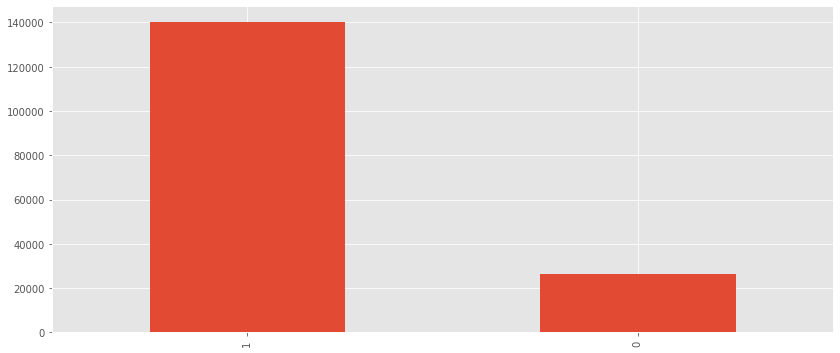

In [49]:
products.sentiment.value_counts().plot.bar()
plt.show()

# Build a model Without data cleaning

# Build model with Bag of words(word count vectorizer)

In [50]:
count_vect = CountVectorizer()

In [51]:
x_BOW = products['review']
y_BOW = products['sentiment']
x_BOW = count_vect.fit_transform(x_BOW)

In [52]:
# Splitting into train and test sets with respect to BOW Vectorizer
x_train_BOW, x_test_BOW, y_train_BOW, y_test_BOW = train_test_split(x_BOW, y_BOW, test_size=0.2, shuffle=False, random_state = 0)

In [53]:
sentiment_classifier_BOW = LogisticRegression(random_state=0, fit_intercept=True)

In [54]:
sentiment_classifier_BOW.fit(x_train_BOW, y_train_BOW)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:
y_predicted_test_BOW = sentiment_classifier_BOW.predict(x_test_BOW)

In [56]:
print("F1 score: ", f1_score(y_test_BOW, y_predicted_test_BOW))

F1 score:  0.9636499159285131


# Confusion matrix for model using all words for BOW Vectorized reviews

In [57]:
cnf_matrix_all_words_BOW = metrics.confusion_matrix(np.squeeze(y_test_BOW), np.squeeze(y_predicted_test_BOW))

In [58]:
cnf_matrix_all_words_BOW

array([[ 3458,  1374],
       [  723, 27796]], dtype=int64)

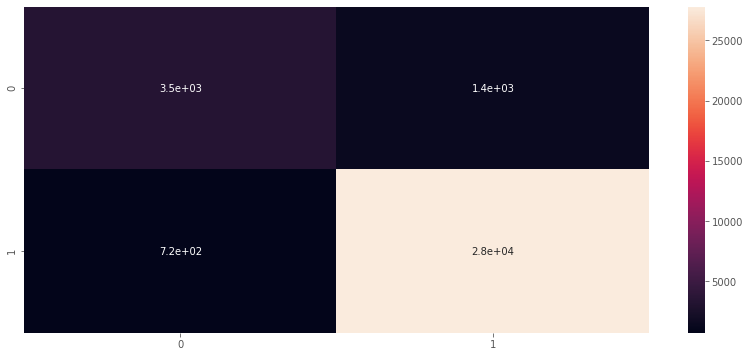

In [59]:
sn.heatmap(cnf_matrix_all_words_BOW, annot=True)
plt.show()

# Build model with TIDIF vectorizer

In [60]:
tfidf = TfidfVectorizer(max_features = 5000)

In [61]:
x = products['review']
y = products['sentiment']

x = tfidf.fit_transform(x)

In [62]:
# Splitting with respect to TIDIF vectorizer
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, shuffle=False, random_state = 0)

In [63]:
sentiment_classifier = LogisticRegression(random_state=0, fit_intercept=True)

In [64]:
sentiment_classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
products['predicted_sentiment'] = sentiment_classifier.predict(x)

In [66]:
y_predicted_test = sentiment_classifier.predict(x_test)

In [67]:
products.head()

,name,review,rating,review_lower,word_count,sentiment,predicted_sentiment
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,came early disappointed love planet wise bags ...,"{'it': 2, 'came': 1, 'early': 1, 'and': 3, 'wa...",1,1
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,soft comfortable warmer looks fit full size be...,"{'very': 1, 'soft': 1, 'and': 2, 'comfortable'...",1,1
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,product well worth purchase found anything els...,"{'this': 3, 'is': 4, 'a': 2, 'product': 2, 'we...",1,1
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,kids cried non stop tried ween pacifier found ...,"{'all': 2, 'of': 1, 'my': 1, 'kids': 2, 'have'...",1,1
5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,binky fairy came house special gift book help ...,"{'when': 2, 'the': 6, 'binky': 3, 'fairy': 3, ...",1,1


In [68]:
print("F1 score: ", f1_score(y_test, y_predicted_test))

F1 score:  0.9647542825534562


# Confusion matrix for model using all words for TIDIF Vectorized reviews

In [69]:
cnf_matrix_all_words = metrics.confusion_matrix(np.squeeze(y_test), np.squeeze(y_predicted_test))

In [70]:
cnf_matrix_all_words

array([[ 3406,  1426],
       [  613, 27906]], dtype=int64)

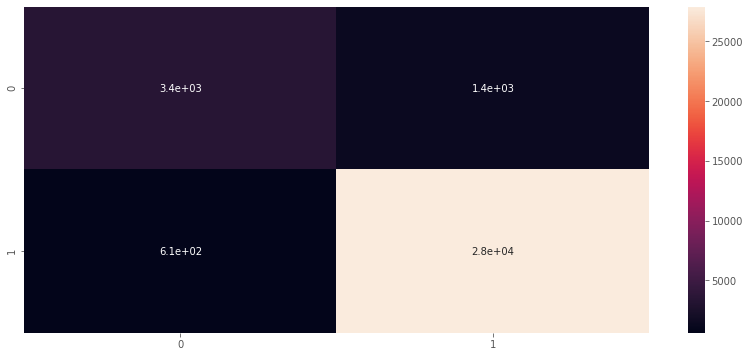

In [71]:
sn.heatmap(cnf_matrix_all_words, annot=True)
plt.show()

# Build a model With cleaned data

# Build model with Bag of words and cleaned data(word count vectorizer)

In [72]:
x_BOW_cln = products['review_lower']
y_BOW_cln = products['sentiment']
x_BOW_cln = count_vect.fit_transform(x_BOW_cln)

In [73]:
# Splitting into train and test sets of the cleaned reviews with respect to BOW Vectorizer
x_train_BOW_cln, x_test_BOW_cln, y_train_BOW_cln, y_test_BOW_cln = train_test_split(x_BOW_cln, y_BOW_cln, test_size=0.2, shuffle=False, random_state = 0)

In [74]:
sentiment_classifier_BOW_cln = LogisticRegression(random_state=0, fit_intercept=True)

In [75]:
sentiment_classifier_BOW_cln.fit(x_train_BOW_cln, y_train_BOW_cln)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [76]:
y_predicted_test_BOW_cln = sentiment_classifier_BOW_cln.predict(x_test_BOW_cln)

In [77]:
print("F1 score: ", f1_score(y_test_BOW_cln, y_predicted_test_BOW_cln))

F1 score:  0.959936285882475


# Confusion matrix for model using cleaned review column and BOW Vectorized reviews

In [78]:
cnf_matrix_BOW_cln = metrics.confusion_matrix(np.squeeze(y_test_BOW_cln), np.squeeze(y_predicted_test_BOW_cln))

In [79]:
cnf_matrix_BOW_cln

array([[ 3315,  1517],
       [  797, 27722]], dtype=int64)

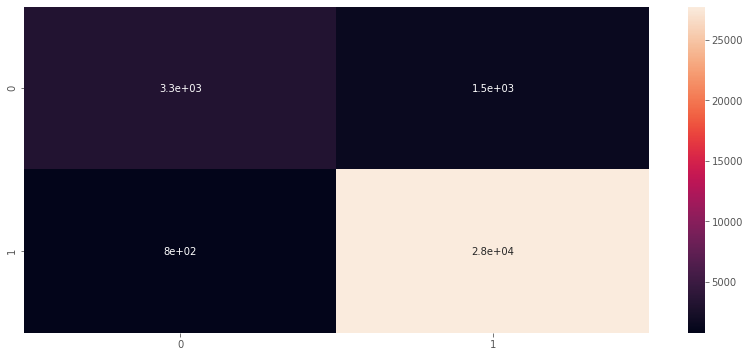

In [80]:
sn.heatmap(cnf_matrix_BOW_cln, annot=True)
plt.show()

# Build model with TIDIF and cleaned data

In [81]:
x_cln = products['review_lower']
y_cln = products['sentiment']

x_cln = tfidf.fit_transform(x_cln)

In [82]:
# Splitting with respect to TIDIF vectorizer
x_train_cln, x_test_cln, y_train_cln, y_test_cln = train_test_split(x_cln, y_cln, test_size=0.2, shuffle=False, random_state = 0)

In [83]:
sentiment_classifier_cln = LogisticRegression(random_state=0, fit_intercept=True)

In [84]:
sentiment_classifier_cln.fit(x_train_cln, y_train_cln)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [85]:
y_predicted_test_cln = sentiment_classifier_cln.predict(x_test_cln)

In [86]:
print("F1 score: ", f1_score(y_test_cln, y_predicted_test_cln))

F1 score:  0.962175960261474


# Confusion matrix for model using cleaned review column and TIDIF Vectorized reviews

In [87]:
cnf_matrix_TIDIF_cln = metrics.confusion_matrix(np.squeeze(y_test_cln), np.squeeze(y_predicted_test_cln))

In [88]:
cnf_matrix_TIDIF_cln

array([[ 3265,  1567],
       [  626, 27893]], dtype=int64)

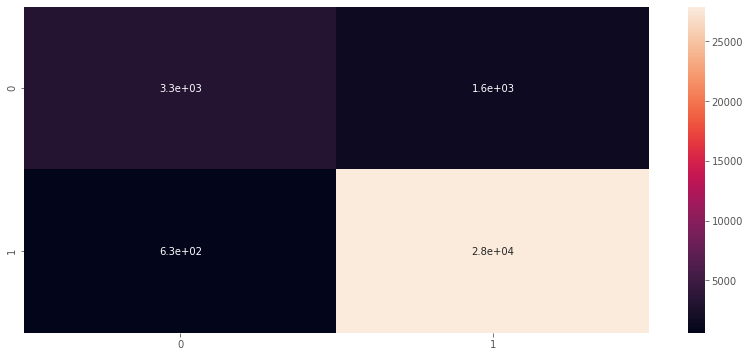

In [89]:
sn.heatmap(cnf_matrix_TIDIF_cln, annot=True)
plt.show()

# ROC score of the model which took all the words into consideration

In [90]:
print("ROC score for BOW before cleaning reviews is : ", metrics.roc_auc_score(y_BOW, sentiment_classifier_BOW.decision_function(x_BOW)))

ROC score for BOW before cleaning reviews is :  0.9806147662741771


In [91]:
print("ROC score for BOW and cleaned reviews is : ", metrics.roc_auc_score(y_BOW_cln, sentiment_classifier_BOW_cln.decision_function(x_BOW_cln)))

ROC score for BOW and cleaned reviews is :  0.9789300291034805


In [92]:
print("ROC score for TIDIF befor cleaning reviews is : " , metrics.roc_auc_score(y, sentiment_classifier.decision_function(x)))

ROC score for TIDIF befor cleaning reviews is :  0.9719608758361417


In [93]:
print("ROC score for TIDIF and cleaned reviews is : " , metrics.roc_auc_score(y_cln, sentiment_classifier_cln.decision_function(x_cln)))

ROC score for TIDIF and cleaned reviews is :  0.966755027364788


In [94]:
giraffe_reviews = products[products['name']== 'Vulli Sophie the Giraffe Teether']

In [95]:
giraffe_reviews

,name,review,rating,review_lower,word_count,sentiment,predicted_sentiment
34313,Vulli Sophie the Giraffe Teether,He likes chewing on all the parts especially t...,5,likes chewing parts especially head ears helpe...,"{'he': 2, 'likes': 1, 'chewing': 1, 'on': 1, '...",1,1
34314,Vulli Sophie the Giraffe Teether,My son loves this toy and fits great in the di...,5,son loves toy fits great diaper bag also easy ...,"{'my': 1, 'son': 1, 'loves': 1, 'this': 1, 'to...",1,1
34315,Vulli Sophie the Giraffe Teether,There really should be a large warning on the ...,1,really large warning box sheesh 2011 many anap...,"{'there': 2, 'really': 1, 'should': 1, 'be': 1...",0,0
34316,Vulli Sophie the Giraffe Teether,All the moms in my moms\' group got Sophie for...,5,moms moms group got sophie babies wondered som...,"{'all': 1, 'the': 2, 'moms': 1, 'in': 1, 'my':...",1,1
34317,Vulli Sophie the Giraffe Teether,I was a little skeptical on whether Sophie was...,5,little skeptical whether sophie going worth mo...,"{'i': 4, 'was': 2, 'a': 1, 'little': 1, 'skept...",1,0
...,...,...,...,...,...,...,...
159649,Vulli Sophie the Giraffe Teether,My baby loves her Sophie Chew Toy. She can che...,5,baby loves sophie chew toy chew sides feet squ...,"{'my': 2, 'baby': 1, 'loves': 1, 'her': 1, 'so...",1,1
159650,Vulli Sophie the Giraffe Teether,Sophie the Giraffe was a big hit at the baby s...,5,sophie giraffe big hit baby shower daughter kn...,"{'sophie': 1, 'the': 2, 'giraffe': 1, 'was': 1...",1,1
159651,Vulli Sophie the Giraffe Teether,quick shipping and perfect product. I would pu...,5,quick shipping perfect product would purchase ...,"{'quick': 1, 'shipping': 1, 'and': 1, 'perfect...",1,1
159652,Vulli Sophie the Giraffe Teether,My baby who is currently teething love his Sop...,5,baby currently teething love sophie little bit...,"{'my': 1, 'baby': 1, 'who': 1, 'is': 1, 'curre...",1,1


In [96]:
giraffe_reviews = giraffe_reviews.sort_values('predicted_sentiment', ascending=False)

In [97]:
giraffe_reviews.head()

,name,review,rating,review_lower,word_count,sentiment,predicted_sentiment
34313,Vulli Sophie the Giraffe Teether,He likes chewing on all the parts especially t...,5,likes chewing parts especially head ears helpe...,"{'he': 2, 'likes': 1, 'chewing': 1, 'on': 1, '...",1,1
34827,Vulli Sophie the Giraffe Teether,We recently received a present of this toy. My...,1,recently received present toy 6 month old daug...,"{'we': 1, 'recently': 1, 'received': 1, 'a': 1...",0,1
34818,Vulli Sophie the Giraffe Teether,My daughter started using this teether at 4 mo...,5,daughter started using teether 4 months six mo...,"{'my': 1, 'daughter': 1, 'started': 1, 'using'...",1,1
34819,Vulli Sophie the Giraffe Teether,My son loves his Weedee as he calls it do much...,5,son loves weedee calls much got one gift frien...,"{'my': 1, 'son': 1, 'loves': 1, 'his': 1, 'wee...",1,1
34820,Vulli Sophie the Giraffe Teether,When I first recevied the gift I thought it wa...,5,first recevied gift thought super cute sure ba...,"{'when': 1, 'i': 5, 'first': 1, 'recevied': 1,...",1,1


In [98]:
giraffe_reviews.tail()

,name,review,rating,review_lower,word_count,sentiment,predicted_sentiment
34732,Vulli Sophie the Giraffe Teether,Received the product and smells like cheap rub...,1,received product smells like cheap rubber bigg...,"{'received': 1, 'the': 1, 'product': 1, 'and':...",0,0
34734,Vulli Sophie the Giraffe Teether,"i know everyone loves this thing, but we took ...",1,know everyone loves thing took away son 3 mont...,"{'i': 1, 'know': 1, 'everyone': 1, 'loves': 1,...",0,0
34566,Vulli Sophie the Giraffe Teether,"I bought this for my teething 6mo old, all the...",2,bought teething 6mo old reviews great however ...,"{'i': 8, 'bought': 1, 'this': 2, 'for': 2, 'my...",0,0
34834,Vulli Sophie the Giraffe Teether,I received this toy within the estimated time ...,5,received toy within estimated time arrival mak...,"{'i': 3, 'received': 1, 'this': 3, 'toy': 1, '...",1,0
34586,Vulli Sophie the Giraffe Teether,I thought it was really good toy and bought it...,1,thought really good toy bought cheap tires hor...,"{'i': 1, 'thought': 1, 'it': 1, 'was': 1, 'rea...",0,0


# Exploring the top weighted words in the TIDIF word vector

In [99]:
word_weights = pd.DataFrame(list(zip(tfidf.get_feature_names(), # get all the n-gram feature names
                                   sentiment_classifier_cln.coef_[0])), # get the logistic regression coefficients
                          columns= ['words','weights']) # defining the colunm names

word_weights.sort_values(['weights'], ascending = False)[:15] # top-15 more important features for positive reviews

,words,weights
2509,love,12.951464
1911,great,11.090043
2512,loves,10.411803
1407,easy,10.320516
3084,perfect,9.958919
2049,highly,7.783108
3085,perfectly,7.511767
453,best,6.990400
1982,happy,6.284963
1524,excellent,6.027442


In [100]:
word_weights.sort_values(['weights'], ascending = False)[-15:] # top-15 more important features for negative reviews

,words,weights
946,concept,-5.688980
592,broke,-5.747172
3199,poorly,-5.785103
2086,horrible,-5.798640
2121,idea,-5.922231
4425,terrible,-5.965010
3573,return,-6.924292
1279,disappointing,-6.946829
4716,useless,-7.064777
4947,worst,-7.295879


# Training a model with only selected words  (TIDIF only as less mis-classifications)

In [101]:
selected_words = ['love', 'great', 'loves', 'easy', 'perfect', 'highly', 'perfectly', 'happy', 'excellent', 'glad', 'pleased', 'disappointed', 'returned', 'waste', 'poor', 'worst', 'useless', 'terrible', 'horrible', 'idea', 'broke', 'concept']

In [102]:
import re
def retain_selected(x):
    resultwords  = [word for word in re.split("\W+",x) if word.lower() in selected_words]
    result = ' '.join(resultwords)
    return(result)

In [103]:
products['review_selected'] = products['review_lower'].apply(lambda x: retain_selected(x))

In [104]:
x_selected = products['review_selected']
y_selected = products['sentiment']

x_selected = tfidf.fit_transform(x_selected)

In [105]:
x_sel_train, x_sel_test, y_sel_train, y_sel_test = train_test_split(x_selected, y_selected, test_size=0.2, shuffle=False, random_state = 0)

In [106]:
selected_words_classifier = LogisticRegression(random_state=0, fit_intercept=True)

In [107]:
selected_words_classifier.fit(x_sel_train, y_sel_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [108]:
y_predicted_test_sel = selected_words_classifier.predict(x_sel_test)

In [109]:
print("F1 score: ", f1_score(y_sel_test, y_predicted_test_sel))

F1 score:  0.9358615169101461


# Confusion matrix for model using selected words

In [110]:
y_predicted_test_selected = selected_words_classifier.predict(x_sel_test)

In [111]:
cnf_matrix_selected_words = metrics.confusion_matrix(np.squeeze(y_sel_test), np.squeeze(y_predicted_test_sel))

In [112]:
cnf_matrix_selected_words

array([[ 1446,  3386],
       [  460, 28059]], dtype=int64)

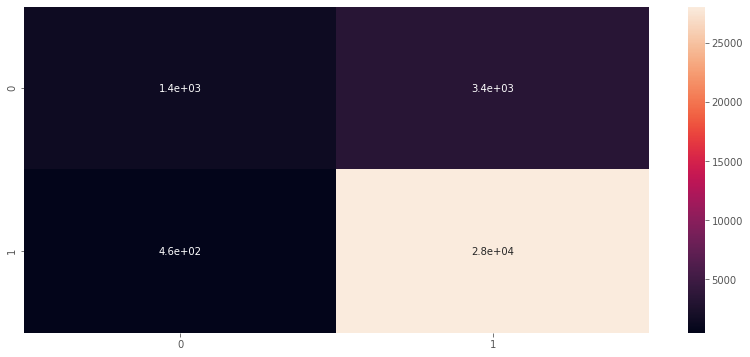

In [113]:
import seaborn as sn
sn.heatmap(cnf_matrix_selected_words, annot=True)
plt.show()

# ROC score of the model which took only the selected words into consideration

In [114]:
metrics.roc_auc_score(y_selected, selected_words_classifier.decision_function(x_selected))

0.8315026606766127